In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
red_dir = "C:/Users/USER/Desktop/Machine_learning/Traffic_Light/Dataset/simulator_dataset_rgb/Red"
green_dir = "C:/Users/USER/Desktop/Machine_learning/Traffic_Light/Dataset/simulator_dataset_rgb/Green"
yellow_dir = "C:/Users/USER/Desktop/Machine_learning/Traffic_Light/Dataset/simulator_dataset_rgb/Yellow"
unknown_dir = "C:/Users/USER/Desktop/Machine_learning/Traffic_Light/Dataset/simulator_dataset_rgb/Unknown"

In [3]:
batch_size = 32
img_height = 224
img_width = 224

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory("C:/Users/USER/Desktop/Machine_learning/Traffic_Light/Dataset/simulator_dataset_rgb", target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='training', classes=['Green', 'Red', 'Yellow'])
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory("C:/Users/USER/Desktop/Machine_learning/Traffic_Light/Dataset/simulator_dataset_rgb", target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='validation', classes=['Green', 'Red', 'Yellow'])

Found 917 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [7]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
29/29 [==============================] - 84s 3s/step - loss: 1.2550 - accuracy: 0.5943
Epoch 2/10
29/29 [==============================] - 75s 3s/step - loss: 0.6789 - accuracy: 0.7154
Epoch 3/10
29/29 [==============================] - 75s 3s/step - loss: 0.5031 - accuracy: 0.8048
Epoch 4/10
29/29 [==============================] - 78s 3s/step - loss: 0.4403 - accuracy: 0.8353
Epoch 5/10
29/29 [==============================] - 78s 3s/step - loss: 0.3309 - accuracy: 0.8746
Epoch 6/10
29/29 [==============================] - 78s 3s/step - loss: 0.2596 - accuracy: 0.9149
Epoch 7/10
29/29 [==============================] - 80s 3s/step - loss: 0.2146 - accuracy: 0.9248
Epoch 8/10
29/29 [==============================] - 81s 3s/step - loss: 0.1705 - accuracy: 0.9411
Epoch 9/10
29/29 [==============================] - 69s 2s/step - loss: 0.2076 - accuracy: 0.9302
Epoch 10/10
29/29 [==============================] - 60s 2s/step - loss: 0.1414 - accuracy: 0.9542


In [8]:
model.save('traffic_light_color_detection_model.h5')

In [9]:
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('traffic_light_color_detection_model.h5')

In [25]:
img_path = "C:/Users/USER/Desktop/Machine_learning/Traffic_Light/Dataset/simulator_dataset_rgb/Test/rstic.jpeg"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))

In [26]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

In [27]:
preds = model.predict(img_array)

1/1 [==============================] - 0s 88ms/step


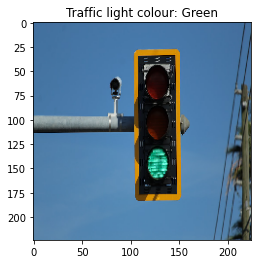

In [28]:
class_idx = np.argmax(preds[0])
class_label = train_generator.class_indices
class_label = dict((v,k) for k,v in class_label.items())
predicted_label = class_label[class_idx]

plt.imshow(img)
plt.title(f'Traffic light colour: {predicted_label}')
plt.show()